In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.loc[:,'color'] = np.where(data['type'] != 'white', 1, 0)
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [4]:
data.drop('type', axis = 1, inplace = True)

In [5]:
data.isna().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
color                    0
dtype: int64

In [6]:
data.dropna(inplace = True, axis = 0)
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [7]:
mean = data.mean()
stdev = data.std()

FSdata = (data - mean) / stdev

In [20]:
print('min value: ', "\n", "\n", FSdata.min(),"\n", "\n", 'max value', "\n", "\n", FSdata.min())

min value:  
 
 fixed acidity          -2.633270
volatile acidity       -1.576715
citric acid            -2.194510
residual sugar         -1.018312
chlorides              -1.341551
free sulfur dioxide    -1.662097
total sulfur dioxide   -1.940577
density                -2.528009
pH                     -3.101975
sulphates              -2.089467
alcohol                -2.089319
quality                -3.227471
color                  -0.571886
dtype: float64 
 
 max value 
 
 fixed acidity          -2.633270
volatile acidity       -1.576715
citric acid            -2.194510
residual sugar         -1.018312
chlorides              -1.341551
free sulfur dioxide    -1.662097
total sulfur dioxide   -1.940577
density                -2.528009
pH                     -3.101975
sulphates              -2.089467
alcohol                -2.089319
quality                -3.227471
color                  -0.571886
dtype: float64


In [21]:
mean

fixed acidity             7.217755
volatile acidity          0.339589
citric acid               0.318758
residual sugar            5.443958
chlorides                 0.056056
free sulfur dioxide      30.516865
total sulfur dioxide    115.694492
density                   0.994698
pH                        3.218332
sulphates                 0.531150
alcohol                  10.492825
quality                   5.818505
color                     0.246480
dtype: float64

In [22]:
FSdata['quality'] = (FSdata['quality'] * stdev['quality']) + mean['quality']

In [23]:
FSdata

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,-0.167773,-0.422677,0.283937,3.207172,-0.315203,0.815546,0.960705,2.099764,-1.359055,-0.544945,-1.418813,6.0,-0.571886
1,-0.707100,-0.240460,0.146245,-0.808089,-0.201165,-0.930066,0.288457,-0.232447,0.508360,-0.276333,-0.832120,6.0,-0.571886
2,0.679741,-0.361938,0.559320,0.306094,-0.172655,-0.029105,-0.330719,0.134043,0.259371,-0.612098,-0.329240,6.0,-0.571886
3,-0.013680,-0.665632,0.008554,0.642451,0.055422,0.928166,1.243757,0.300630,-0.176359,-0.880711,-0.496866,6.0,-0.571886
4,-0.013680,-0.665632,0.008554,0.642451,0.055422,0.928166,1.243757,0.300630,-0.176359,-0.880711,-0.496866,6.0,-0.571886
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,-0.321867,1.703183,-1.643744,-0.745022,0.340519,-0.141725,-1.374473,0.603817,1.255326,1.939720,-0.832120,6.0,1.748328
6492,-0.784147,1.581706,-1.643744,-0.723999,0.967732,0.083515,-1.268329,0.067408,1.442067,0.328046,0.006013,5.0,1.748328
6494,-0.707100,1.035056,-1.299515,-0.660933,0.568596,-0.085415,-1.339092,0.347274,1.255326,1.469649,0.425080,6.0,1.748328
6495,-1.015288,1.855030,-1.368361,-0.723999,0.540087,0.083515,-1.268329,0.257317,2.189033,1.201036,-0.245427,5.0,1.748328


In [24]:
FSdata.groupby('quality').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
quality,,,,,,,,,,,,
3.0,30,30,30,30,30,30,30,30,30,30,30,30
4.0,214,214,214,214,214,214,214,214,214,214,214,214
5.0,2128,2128,2128,2128,2128,2128,2128,2128,2128,2128,2128,2128
6.0,2820,2820,2820,2820,2820,2820,2820,2820,2820,2820,2820,2820
7.0,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074
8.0,192,192,192,192,192,192,192,192,192,192,192,192
9.0,5,5,5,5,5,5,5,5,5,5,5,5


In [25]:
Xcolumns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
            'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'color']

FSdata = FSdata.sample(frac = 1)
FSdata.reset_index(inplace = True, drop = True)
#dataY = pd.get_dummies(FSdata.loc[:,'quality'])
trainCutoff = round(len(data)*0.6)
trainX = FSdata.loc[0:trainCutoff, Xcolumns]
trainY = FSdata.loc[0:trainCutoff, 'quality']
CVCutoff = round(len(FSdata)*0.8)
CVX = FSdata.loc[(trainCutoff + 1):(CVCutoff - 1), Xcolumns]
CVY = FSdata.loc[(trainCutoff + 1):(CVCutoff - 1), 'quality']
testX = FSdata.loc[CVCutoff:, Xcolumns]
testY = FSdata.loc[CVCutoff:, 'quality']

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
log_reg = LogisticRegression(multi_class = 'ovr', max_iter = 500, solver = 'lbfgs')
log_reg.fit(trainX, trainY)
CVY_predict = log_reg.predict_proba(CVX)

In [35]:
CVY_predict = log_reg.predict_proba(CVX)

In [36]:
prediction = pd.DataFrame(CVY_predict)
prediction.columns = ['3', '4', '5', '6', '7', '8', '9']
prediction

,3,4,5,6,7,8,9
0,0.005982,0.010523,0.290879,0.528398,0.153150,0.010737,0.000330
1,0.000656,0.002175,0.024865,0.431610,0.483099,0.053484,0.004111
2,0.000299,0.023570,0.404121,0.479281,0.083417,0.009186,0.000127
3,0.004267,0.015719,0.197789,0.478594,0.258959,0.043838,0.000834
4,0.008675,0.009283,0.161364,0.472326,0.337280,0.009177,0.001895
...,...,...,...,...,...,...,...
1286,0.001393,0.007414,0.165631,0.502537,0.276309,0.046461,0.000256
1287,0.004540,0.036681,0.568478,0.344629,0.039448,0.006135,0.000088
1288,0.002145,0.007627,0.475353,0.452016,0.051225,0.011535,0.000099
1289,0.000762,0.017480,0.182523,0.556566,0.218892,0.023633,0.000144


In [37]:
prediction = prediction.idxmax(axis = 1)

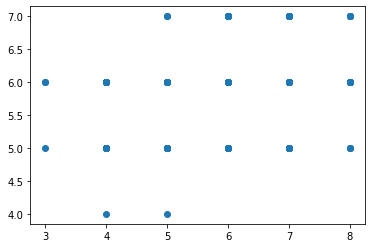

In [38]:
prediction = prediction.astype('int')
plt.scatter(CVY, prediction)

In [46]:
CVY.reset_index(drop= True, inplace = True)
prediction = prediction.astype("float64")
error = CVY - prediction

result = np.where(error != 0, 'correct', 'incorrect')
result = pd.DataFrame(result)

In [49]:
result

,0
0,incorrect
1,incorrect
2,correct
3,incorrect
4,correct
...,...
1286,correct
1287,incorrect
1288,correct
1289,correct


In [50]:
result.describe()

,0
count,1291
unique,2
top,incorrect
freq,723


723 correctly assigned qualities
1291 - 723 = 568 incorrectly assigned ones

In [54]:
#calculate precision and recall for cross validation set
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

A confusion matrix shows us which classes are correctly/incorrectly predicted. Each row represents an actual class, and the column represents a predicted class. The index/columns are 3, 4, 5, 6, 7, 8 for quality. For example, in the second row, there was one wine correctly assigned to quality = 4. This one wine is a true positive. There were 23 wines assigned to quality = 5 and 13 to quality = 6 by the model that were actually quality = 4. This makes for 36 false negatives for quality = 4. There is one false positive for quality = 4 (was actually quality = 5). True negatives for quality = 4 is the summation of all other fields in the confusion table that are not in the 4th column or 4th row (1253). They were not predicted to be quality = 4 and they were not actually quality = 4. 

In summary for actual class wine quality = 4:
True positives: 1
False negatives: 36
False positives: 1
True negatives: 1253



In [57]:
conf_mat = confusion_matrix(CVY, prediction)
print(conf_mat)

[[  0   0   1   2   0   0]
 [  0   1  23  13   0   0]
 [  0   1 272 143   2   0]
 [  0   0 132 423  27   0]
 [  0   0  16 174  27   0]
 [  0   0   3  27   4   0]]


Precision and recall are error metrics in classification. Precision focuses on whether the model prediction is right or not. Whereas recall tests the sensitivity of the model. Precision may be higher if we simplify the model to always predicting wine quality will be 6, regardless of any information about the wine. However, the recall would be poor. It is about crafting and tweaking the model to balance both precision and recall scores.

Precision = True positives / (True positives + False positives)
Recall = True positives / (True positives + False negatives)

for wine quality = 4:
Precision = 0.5
Recall = 0.0008

We can use the sci-kit learn library to calculate a precision and recall score for our multiclass cross validation set.

In [67]:
precision_score(CVY, prediction, average = 'micro')

0.5600309837335399

In [66]:
recall_score(CVY, prediction, average = 'micro')

0.5600309837335399

In [73]:
from sklearn.metrics import precision_recall_curve
from sklearn.multiclass import OneVsRestClassifier

In [92]:
log_reg = LogisticRegression(multi_class = 'ovr', max_iter = 500, solver = 'lbfgs')
log_reg.fit(trainX, trainY)
train_predict_OvsA = log_reg.predict_proba(trainX)

In [93]:
train_predict_OvsA 

array([[7.12393445e-03, 4.18104715e-03, 1.10416629e-01, ...,
        3.23889090e-01, 1.37857982e-02, 2.35674601e-04],
       [3.66353712e-03, 3.93989057e-02, 6.62093760e-01, ...,
        2.12617296e-02, 2.26563419e-03, 1.95574029e-05],
       [1.32821084e-03, 1.13655489e-02, 4.49517210e-01, ...,
        7.48079943e-02, 2.16247231e-03, 2.24578681e-05],
       ...,
       [2.18945198e-03, 2.57132860e-02, 2.49865412e-01, ...,
        2.12988302e-01, 2.31071076e-02, 4.50161330e-04],
       [4.68349294e-03, 8.47931989e-02, 6.46764923e-01, ...,
        1.66044199e-02, 8.53517781e-04, 7.92671280e-06],
       [2.57644779e-03, 7.77106683e-03, 5.38414679e-01, ...,
        5.25837655e-02, 9.50093855e-03, 1.57514233e-04]])

In [100]:
from sklearn import preprocessing

In [101]:
lb = preprocessing.LabelBinarizer()
lb.fit(CVY)

LabelBinarizer()

In [102]:
lb.classes_

array([3., 4., 5., 6., 7., 8.])

In [103]:
CVY_OvA = lb.transform(CVY)

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=int32)

In [106]:
trainY_OvA = lb.transform(trainY)

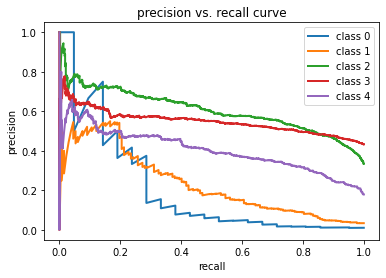

In [133]:
precision = dict()
recall = dict()
for i in range(5):
    precision[i], recall[i], _ = precision_recall_curve(trainY_OvA[:, i],
                                                        train_predict_OvsA [:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

the F1 score incorporates both precision and recall giving us a good "metric" for our model.

F1 score = 2 * precision * recall / (precision + recall) = 2 * 0.56 * 0.56 / (0.56 + 0.56) = 0.56

Next we can adjust the thresold of probablility for which we assign each wine quality.

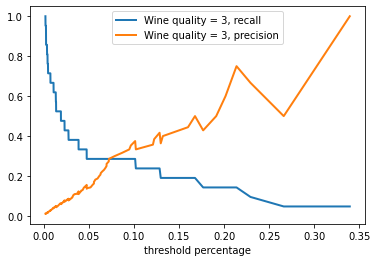

In [137]:
precision, recall, threshold = precision_recall_curve(trainY_OvA[:, 0], train_predict_OvsA [:, 0])
plt.plot(threshold, recall[:-1], lw=2, label='Wine quality = 3, recall')
plt.plot(threshold, precision[:-1], lw=2, label='Wine quality = 3, precision')
plt.xlabel("threshold percentage")
plt.legend(loc="best")
plt.show()

based on this, it should only be quality = 3 if the probablility is ~ 0.1

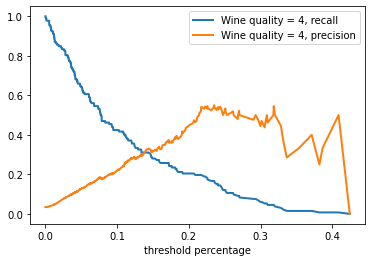

In [138]:
precision, recall, threshold = precision_recall_curve(trainY_OvA[:, 1], train_predict_OvsA [:, 1])
plt.plot(threshold, recall[:-1], lw=2, label='Wine quality = 4, recall')
plt.plot(threshold, precision[:-1], lw=2, label='Wine quality = 4, precision')
plt.xlabel("threshold percentage")
plt.legend(loc="best")
plt.show()

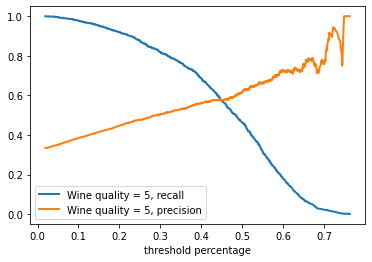

In [139]:
precision, recall, threshold = precision_recall_curve(trainY_OvA[:, 2], train_predict_OvsA [:, 2])
plt.plot(threshold, recall[:-1], lw=2, label='Wine quality = 5, recall')
plt.plot(threshold, precision[:-1], lw=2, label='Wine quality = 5, precision')
plt.xlabel("threshold percentage")
plt.legend(loc="best")
plt.show()

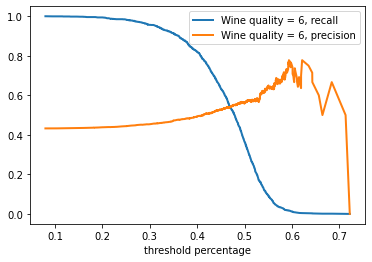

In [140]:
precision, recall, threshold = precision_recall_curve(trainY_OvA[:, 3], train_predict_OvsA [:, 3])
plt.plot(threshold, recall[:-1], lw=2, label='Wine quality = 6, recall')
plt.plot(threshold, precision[:-1], lw=2, label='Wine quality = 6, precision')
plt.xlabel("threshold percentage")
plt.legend(loc="best")
plt.show()

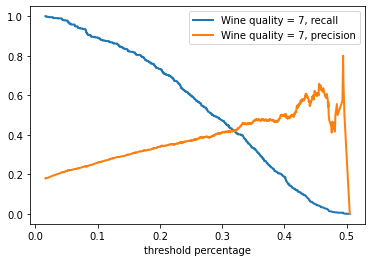

In [142]:
precision, recall, threshold = precision_recall_curve(trainY_OvA[:, 4], train_predict_OvsA [:, 4])
plt.plot(threshold, recall[:-1], lw=2, label='Wine quality = 7, recall')
plt.plot(threshold, precision[:-1], lw=2, label='Wine quality = 7, precision')
plt.xlabel("threshold percentage")
plt.legend(loc="best")
plt.show()

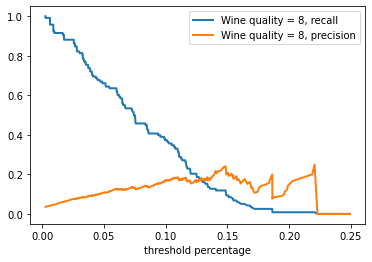

In [141]:
precision, recall, threshold = precision_recall_curve(trainY_OvA[:, 5], train_predict_OvsA [:, 5])
plt.plot(threshold, recall[:-1], lw=2, label='Wine quality = 8, recall')
plt.plot(threshold, precision[:-1], lw=2, label='Wine quality = 8, precision')
plt.xlabel("threshold percentage")
plt.legend(loc="best")
plt.show()

## Support Vector Machines

In [146]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [148]:
rbf_kernel_svm_clf = Pipeline([('scaler', StandardScaler()), ('svm_clf', SVC(kernel = 'rbf', gamma = 5, C = 0.001))])
rbf_kernel_svm_clf.fit(trainX, trainY)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [150]:
train_predict_svm = rbf_kernel_svm_clf.predict(trainX)

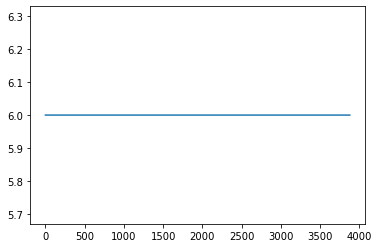

In [155]:
plt.plot(train_predict_svm)